# Dataset #2 Preprocessing and Exploration

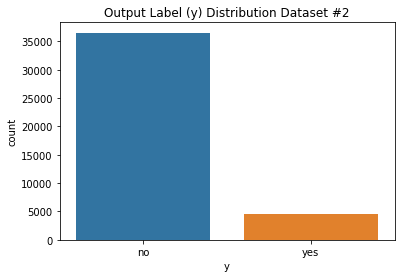

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
import seaborn as sns

ds1 = pd.read_csv('./data/bank-additional-full.csv', delimiter=';')
ds1.dropna()
ds1.drop_duplicates()
ax2 = sns.countplot(x="y", data=ds1).set_title("Output Label (y) Distribution Dataset #2")

Text(0.5, 1.0, 'Correlation Matrix')

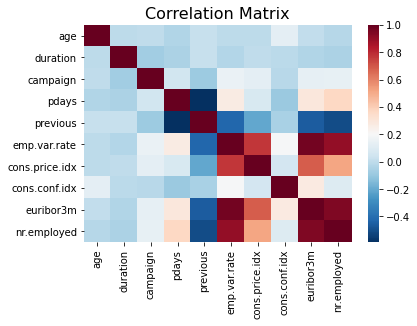

In [2]:
sns.heatmap(ds1.select_dtypes(exclude="object").corr(), cbar=True, cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=16,)

In [3]:
ds1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
ds1_dummies = pd.get_dummies(ds1, columns=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'])
ds1_dummies.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'mon

In [5]:
ds1_dummies.dropna()
ds1_dummies['y'].value_counts()
ds1_dummies['y'] = ds1_dummies['y'].map({'yes':1, 'no': 0})
ds1_labels = ds1_dummies['y']
ds1_dummies = ds1_dummies.drop(['y'], axis=1)
ds1_dummies.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oc

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(ds1_dummies, ds1_labels, test_size=0.20, stratify=ds1_labels)

print ("number of training samples: ", len(X_train))
print ("number of test samples: ", len(y_test))

number of training samples:  32950
number of test samples:  8238


In [7]:
from sklearn.neural_network import MLPClassifier 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np
pipe_steps = [('scaler', StandardScaler()), ('ann', MLPClassifier(hidden_layer_sizes=(100, ), alpha=0.0001, batch_size='auto', learning_rate='constant', power_t=0.5, shuffle=True, random_state=0, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=True, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000))]

check_params = {'ann__activation':['logistic', 'tanh', 'relu'], 
                'ann__solver': ['adam', 'sgd'],
                'ann__learning_rate_init': [0.001, 0.005, 0.010, 0.05, 0.1],
                'ann__max_iter': [50, 100, 150, 200]}

pipeline = Pipeline(pipe_steps)
print(pipeline)

Pipeline(steps=[('scaler', StandardScaler()),
                ('ann', MLPClassifier(early_stopping=True, random_state=0))])


In [8]:
from tqdm import tqdm_notebook as tqdm
print ("start fitting the data")
import warnings
warnings.filterwarnings("ignore")


for cv in tqdm(range(3, 10)):
    create_grid = GridSearchCV(pipeline, param_grid=check_params, cv=cv, n_jobs=6)
    create_grid.fit(X_train, y_train)
    print("score for %d fold CV := %5.4f" %(cv, create_grid.score(X_test, y_test)))
    print ("!!!! best fit parameters from GridSearchCV !!!!")
    print (create_grid.best_params_)
    

print ("out o' the loop")


start fitting the data


score for 3 fold CV := 0.9081
!!!! best fit parameters from GridSearchCV !!!!
{'ann__activation': 'logistic', 'ann__learning_rate_init': 0.05, 'ann__max_iter': 50, 'ann__solver': 'sgd'}
score for 4 fold CV := 0.9091
!!!! best fit parameters from GridSearchCV !!!!
{'ann__activation': 'relu', 'ann__learning_rate_init': 0.01, 'ann__max_iter': 50, 'ann__solver': 'sgd'}
score for 5 fold CV := 0.9113
!!!! best fit parameters from GridSearchCV !!!!
{'ann__activation': 'logistic', 'ann__learning_rate_init': 0.005, 'ann__max_iter': 50, 'ann__solver': 'adam'}
score for 6 fold CV := 0.9113
!!!! best fit parameters from GridSearchCV !!!!
{'ann__activation': 'logistic', 'ann__learning_rate_init': 0.005, 'ann__max_iter': 50, 'ann__solver': 'adam'}
score for 7 fold CV := 0.9094
!!!! best fit parameters from GridSearchCV !!!!
{'ann__activation': 'logistic', 'ann__learning_rate_init': 0.001, 'ann__max_iter': 50, 'ann__solver': 'adam'}
score for 8 fold CV := 0.9094
!!!! best fit parameters from GridSear

In [9]:
%%time
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef


DecsTree = MLPClassifier(activation='logistic', learning_rate_init=0.005, solver='adam', max_iter=50)
DecsTree.fit(X_train, y_train)

y_pred_train = DecsTree.predict(X_train)
y_pred_test = DecsTree.predict(X_test)
conf_matrix_test = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
conf_matrix_train = pd.DataFrame(confusion_matrix(y_train, y_pred_train))
print('training data confusion matrix')
print(conf_matrix_train)
print('testing data confusion matrix')
print(conf_matrix_test)

print('training accuracy rate: {}'.format(accuracy_score(y_train, y_pred_train)))
print('test accuracy rate: {}'.format(accuracy_score(y_test, y_pred_test)))

print('training error rate: {}'.format(1 - accuracy_score(y_train, y_pred_train)))
print('test error rate: {}'.format(1 - accuracy_score(y_test, y_pred_test)))

print('training matthews_corrcoef Score: {}'.format(matthews_corrcoef(y_train, y_pred_train)))
print('test matthews_corrcoef score: {}'.format(matthews_corrcoef(y_test, y_pred_test)))

training data confusion matrix
       0     1
0  27440  1798
1   1637  2075
testing data confusion matrix
      0    1
0  6846  464
1   421  507
training accuracy rate: 0.8957511380880121
test accuracy rate: 0.892571012381646
training error rate: 0.1042488619119879
test error rate: 0.10742898761835395
training matthews_corrcoef Score: 0.48839877055926784
test matthews_corrcoef score: 0.47344340789970496
CPU times: user 14.2 s, sys: 2.01 s, total: 16.2 s
Wall time: 2.8 s


In [26]:
#from matplotlib.pyplot import figure
#figure(figsize=(80,60))
#tree.plot_tree(DecsTree, 
#                   filled=True)


In [27]:
#from sklearn.tree import export_graphviz
#export_graphviz(DecsTree, out_file='tree_limited.dot',
#                rounded = True, proportion = False, precision = 2, filled = True)

In [28]:
#X_train

In [30]:
#from sklearn.model_selection import learning_curve
#import math
#cv = 5
#factor= (cv - 1)/cv
#ts = math.floor(X_train.shape[0]*factor)


#train_sizes, train_scores, valid_scores = learning_curve(
#    DecisionTreeClassifier(criterion='entropy', max_depth=8, splitter='best', ccp_alpha=0.001), X_train, y_train, train_sizes=np.arange(1,ts,1000), cv=cv)



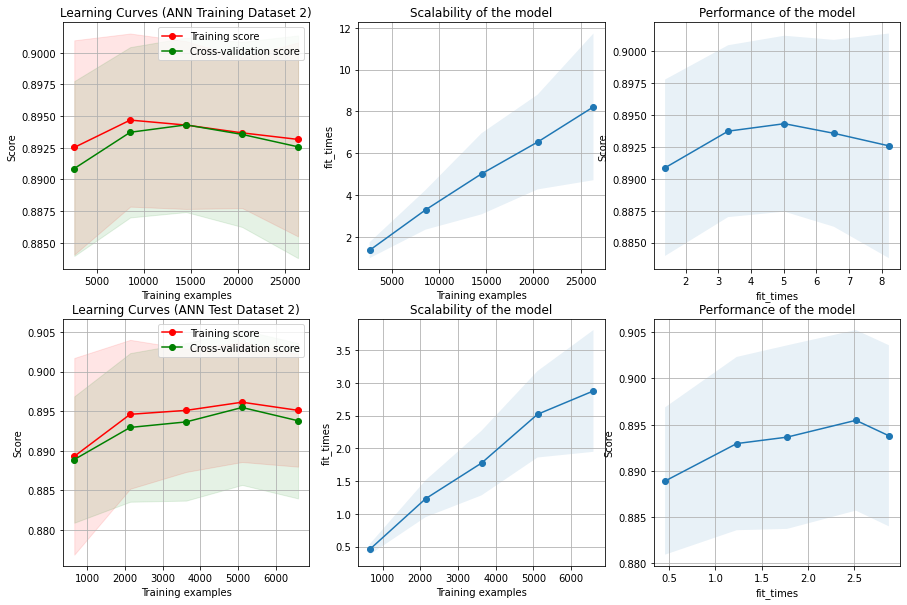

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(2,3, figsize=(15, 10))

title = "Learning Curves (ANN Training Dataset 2)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = MLPClassifier(activation='logistic', learning_rate_init=0.005, solver='adam', max_iter=50)

plot_learning_curve(estimator, title, X_train, y_train,cv=cv, n_jobs=-1, axes=axes[0, :])
title = "Learning Curves (ANN Test Dataset 2)"

plot_learning_curve(estimator, title, X_test, y_test,cv=cv, n_jobs=-1, axes=axes[1, :])



plt.show()


